In [14]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
with open('preprocessed_data.pickle','rb') as f:
    data = pickle.load(f)

#### Function Definations

In [12]:
def flat_array(arrayOfArrays):
    '''Takes a list of list and flattens it'''
    return list(np.concatenate([x for x in arrayOfArrays]).flat)

# Exploratory Data Analysis
> **GENERAL**
>   - The data is collected from 24st July 2020 to 30th August 2020,
>   - 50%  overall `tweets` were `sent from` Phones and Tablets,  35% from Webapp and other sources,
>   - Top Twitters `do not use` phones and tablets,rather they `use` Webapp and other sources,
>   - 42% of the top accounts are `verified` and others top accounts are unverified,
>   - Verified accounts have `high followings` whereas Unverified accounts have `high number of friends` *mostly*,
>   - Older accounts that are verified had `verticle User growth`,
>   - Verified Users post `more posts` and are generally `older accounts`,
>   - There is `some corelation` beteween Total Number of likes and total number of posts.

> **TOP**
>   - `Most tweets` are from India, USA and unknown region,
>   - Top 2 `most frequently tweeting accounts` are GlobalPandemic.NET and Coronavirus Updates,
>   - Top `growing accounts` in this data are `Anonymous, CDC and Ministry of Health`,
>   - Top 3 `liked accounts` are paolo ignazio marong, scarlet monahan and IAM Platform,
>   - Top twitters post most of their tweets `at times` between 4-6 am and then some tweets between 4-5 pm,
>   - Top tweeters are trending by using `hashtags` [covid19,coronavirus],
>   - Top `mentioned` person is @realdonaldtrump, **overall and daily**.

> **SENTIMENTS**
>   - 17% overall tweets were Negative,
>   - 20% of people actually like the negative sentimented posts,
>   - The ratio of Positive, Neutral and Negative sentiments everyday is almost the same.

**THE STORY TELLING**        
I have analysed the tweets dating from 24st July 2020 to 30th August 2020. Among all these tweets, 50% of the overall tweets were sent combined `Phones and Tablets`, 35% from `twitter website` and rest from other `3rd party sources`. However, top tweeters use more `twitter website` and `other sources`. This might be because they are professionals and have their own platforms, automations, etc.     

A very small sample of the users are verified in the total population, but it is not surprising that almost half users are verified in the top twitters list. They post more posts and are generally oldest amongst others. We can also notice that verified users have high followers but less number of friends. Also, the verified accounts that are old enough had a steep inclined verticle follower growth in this time span. 

Most of the tweets came from **geographical regions** of `India and USA` mainly from user accounts `GlobalPandemic.NET` and `Coronavirus Updates`. They posted their tweets each day around 4-6 am and 4-5 pm using the hashtags `covid19` and `coronavirus`. It is also intersting to note that most tweets mentioned `realdonaldtrump` that to almost daily. We can also see that posting more posts does not grow the account as much. The most growing accounts in these days are `Anonymous`, `CDC` and `Ministry of Health` and the most liked accounts are `ignazio marong`, `scarlet monahan` and `IAM Platform`.

If we analyse the **sentiment** of tweets, we that that only 17% of tweets possess negative sentiment from the top 10 sources and 20% of population of likes these tweets and the ratio of tweets for positive, neutral and negative sentiments for each day also remains almost the same. 

In [82]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,post_year,post_month,post_day,post_hour,user_created_month,mentions,user_location_end,text_sentiment,Hashtags Count,Mentions Count
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,[],iPhone,False,2020,Jul,25,12,5,[],astroworld,Negative,0,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,[],Android,False,2020,Jul,25,12,4,"[Yankees, YankeesPR, MLB]",NY,Positive,0,3
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed COVID19 was a hoax...,[COVID19],Android,False,2020,Jul,25,12,2,"[diane3443, wdunlap, realDonaldTrump]",KY,Neutral,1,3
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift COVID19 has give me is an apprec...,[COVID19],iPhone,False,2020,Jul,25,12,3,[brookbanktv],Stuck in the Middle,Neutral,1,1
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...,"[CoronaVirusUpdates, COVID19]",Android,False,2020,Jul,25,12,2,"[kansalrohit69, DrSyedSehrish, airnewsalerts, ...",Jammu and Kashmir,Neutral,2,4


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_followers,179108.0,109055.528184,841467.000703,0.0,172.0,992.0,5284.00,49442559.0
user_friends,179108.0,2121.701566,9162.553072,0.0,148.0,542.0,1725.25,497363.0
user_favourites,179108.0,14444.105663,44522.698958,0.0,206.0,1791.0,9388.00,2047197.0
post_year,179108.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.00,2020.0
post_day,179108.0,17.140117,9.360644,1.0,9.0,17.0,26.00,31.0
post_hour,179108.0,9.349113,5.788579,0.0,5.0,8.0,15.00,23.0
user_created_month,179108.0,6.084195,3.314292,1.0,3.0,6.0,9.00,12.0
Hashtags Count,179108.0,1.485333,1.561917,0.0,0.0,1.0,2.00,17.0
Mentions Count,179108.0,0.476182,1.035737,0.0,0.0,0.0,1.00,13.0


In [85]:
data['date'].min(), data['date'].max()

(Timestamp('2020-07-24 23:47:08'), Timestamp('2020-08-30 09:07:39'))

**The data is collected from 24st July 2020 to 30th August 2020**

In [5]:
categorical_cols = ['source','user_verified','is_retweet','text_sentiment']

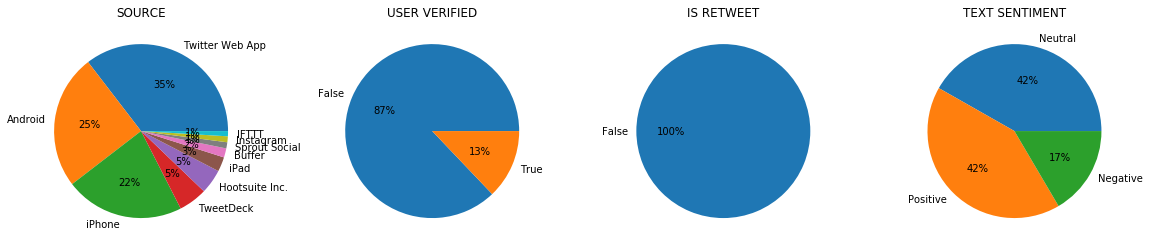

In [6]:
top_n_sources = 10
plt.figure(figsize=(20,4))
for i,feature in enumerate(categorical_cols,start=1):
    plt.subplot(1,len(categorical_cols), i)
    plt.title(feature.replace("_"," ").upper())
    plt.pie(data[feature].value_counts()[:top_n_sources], labels=data[feature].value_counts().index.values[:top_n_sources], autopct='%.0f%%');
plt.show();

- **50%  overall tweets were sent through Phones and Tablets,  35% from Webapp**    
- **17% overall tweets were Negative.**

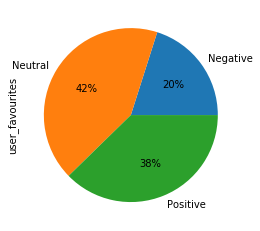

In [94]:
data.groupby('text_sentiment').sum()['user_favourites'].plot.pie(autopct="%.0f%%");

- **20% of people actually like the negative sentimented posts**

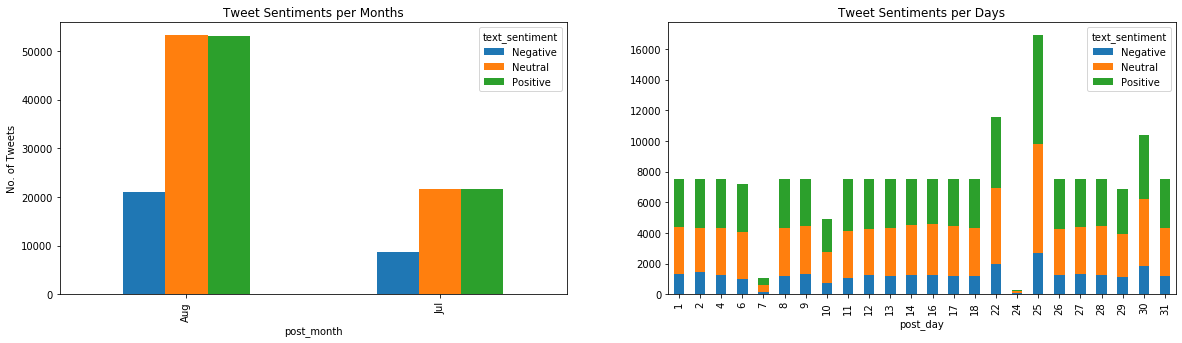

In [7]:
plt.figure(figsize=(20,5))
data.groupby('text_sentiment')['post_month'].value_counts().unstack().T.plot.bar(ax=plt.subplot(1,2,1))
plt.title("Tweet Sentiments per Months"); plt.ylabel("No. of Tweets")
data.groupby(['post_day','text_sentiment']).count()['text'].unstack().plot.bar(stacked=True, ax=plt.subplot(1,2,2));
plt.title("Tweet Sentiments per Days");

The sentiment ratio is surprisingly normal

In [9]:
# Top twitters df
top_n = 30
top_twitters = data['user_name'].value_counts()[:top_n].index.values
top_twitters_data = data[ data['user_name'].isin(top_twitters) ]

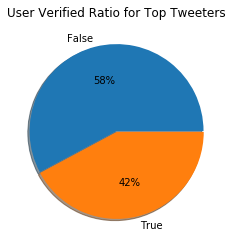

In [10]:
plt.pie(top_twitters_data['user_verified'].value_counts(), labels=top_twitters_data['user_verified'].value_counts().index, explode=(0,0.01), shadow=True, autopct='%.0f%%');
plt.title("User Verified Ratio for Top Tweeters");

- **Only a few fraction of Users were Verified in total dataset, but if we look at the Top n users, almost half of them are verified**

In [15]:
# Top mentions df
top_n_mentions = 30
top_mentions = [x.lower() for x in flat_array(data['mentions'])]
top_mentions = Counter(top_mentions).most_common()
top_mentions = pd.DataFrame(top_mentions, columns=['Mention','Count'])
top_mentions.head()

,Mention,Count
0,realdonaldtrump,3998
1,who,725
2,gop,471
3,joebiden,420
4,potus,407


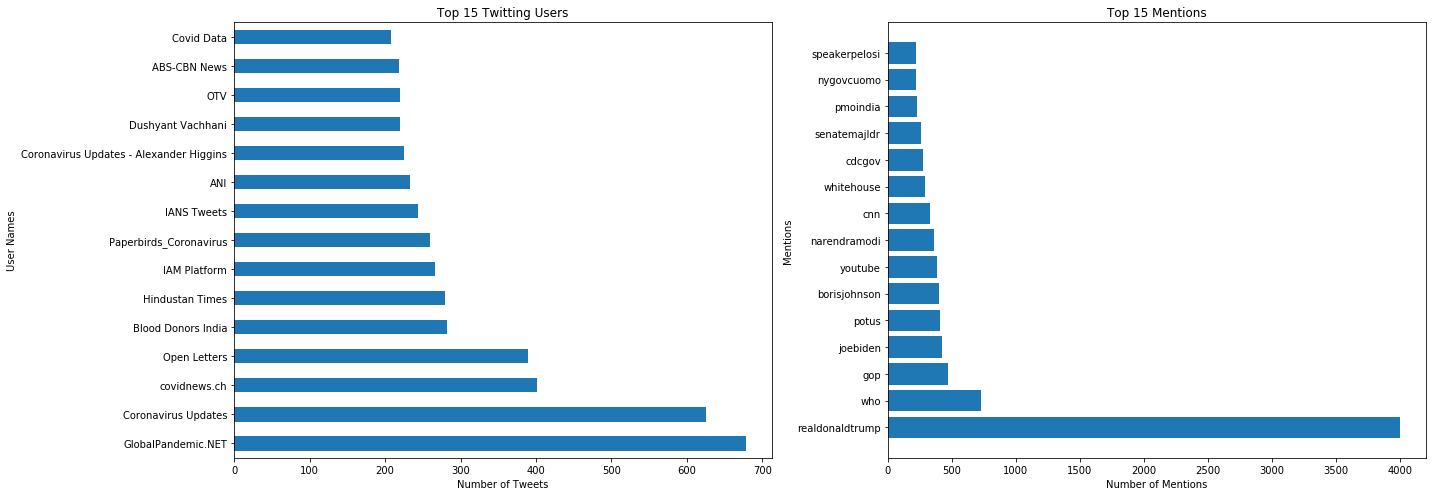

In [76]:
plt.figure(figsize=(20,7));
plt.subplot(1,2,1)
plt.title(f"Top {top_n} Twitting Users"); plt.xlabel("Number of Tweets"); plt.ylabel("User Names");
data['user_name'].value_counts()[:top_n].sort_values(ascending=False).plot.barh();

plt.subplot(1,2,2)
plt.title(f"Top {top_n} Mentions"); plt.xlabel("Number of Mentions"); plt.ylabel("Mentions");
plt.barh(top_mentions['Mention'][:top_n], top_mentions['Count'][:top_n], )
plt.tight_layout()

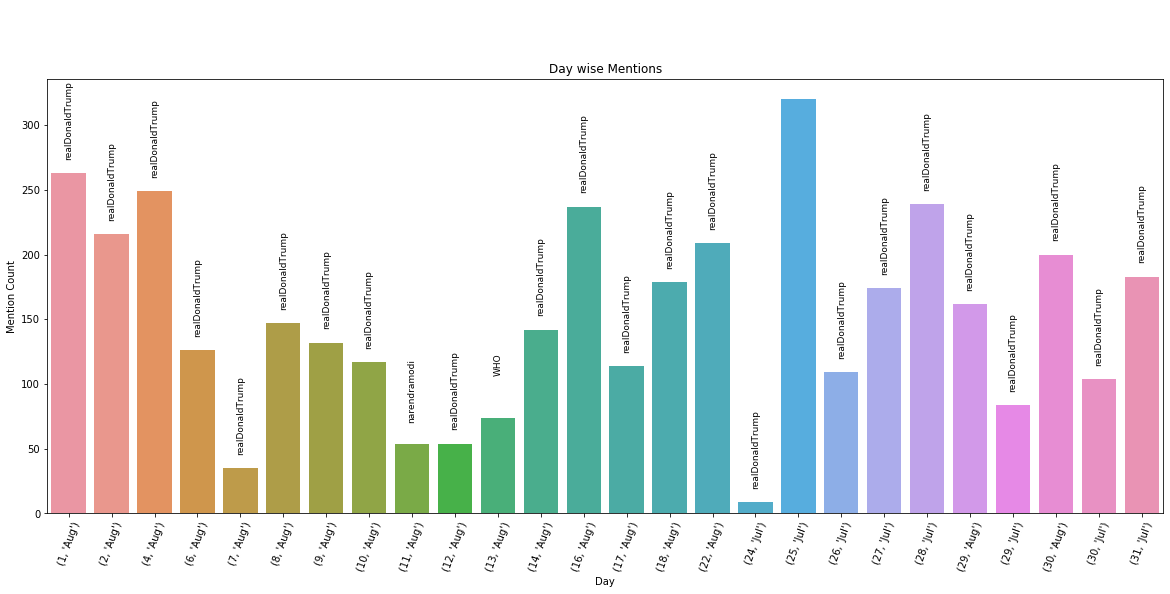

In [17]:
arr = []
for group,attrs in data.groupby(['post_day','post_month']):
    c = Counter(flat_array(data[ (data['post_day']==group[0])&(data['post_month']==group[1]) ]['mentions'])).most_common()[0]
    arr.append([group,c[0],c[1]])
mentions_per_day = pd.DataFrame(arr, columns=['Day','Most Frequent Mention Per Day', 'Mention Count'])

plt.figure(figsize=(20,8))
x = sns.barplot(mentions_per_day['Day'], mentions_per_day['Mention Count'])
for p,mention in zip(x.patches,mentions_per_day['Most Frequent Mention Per Day']):
    x.annotate(mention, 
                   (p.get_x() + p.get_width() / 2., p.get_height()+50), 
                   ha = 'center', va = 'center', 
                   size=9,
                   xytext = (0, -12), 
                   textcoords = 'offset points',
              rotation=90)
plt.xticks(rotation=70); plt.title("Day wise Mentions");

- **GlobalPandemic.NET and Coronavirus Updates are the top 2 most frequently tweeters**,
- **@realdonaldtrump** is being attributed the most, **overall and daily**.

In [18]:
data[ data['user_name']=='NEWS9' ]['user_created'][:5]

166    2012-07-12 05:31:57
1168   2012-07-12 05:31:57
2346   2012-07-12 05:31:57
2533   2012-07-12 05:31:57
3157   2012-07-12 05:31:57
Name: user_created, dtype: datetime64[ns]

<font color='red'>I am wondering how can creation of user data change per tweet!

In [19]:
'realDonaldTrump' in data['mentions'][2]

True

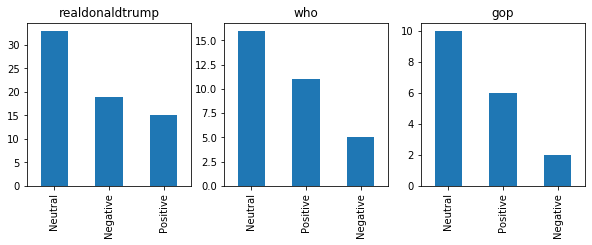

In [20]:
chosen_mentions = top_mentions['Mention'][:3]
chosen_mentions_df = pd.DataFrame() 
plt.figure(figsize=(10,3))
for i,mention in enumerate(chosen_mentions,start=1):
    plt.subplot(1,len(chosen_mentions), i); plt.title(mention)
    data[ data['mentions'].apply(lambda x: mention in x ) ]['text_sentiment'].value_counts().plot.bar()

No useful insight found here

In [23]:
# top hashtags used by top twitters
all_hashtags = flat_array(top_twitters_data['hashtags'])
all_hashtags = [hashtag.lower() for hashtag in all_hashtags]   
sorted_hashtags = Counter(all_hashtags).most_common()
sorted_hashtags = pd.DataFrame(sorted_hashtags, columns=['Hashtag','Count'])
sorted_hashtags.head()

,Hashtag,Count
0,covid19,4383
1,coronavirus,1872
2,coronaviruspandemic,635
3,coronavirusupdate,629
4,coronainfoch,405


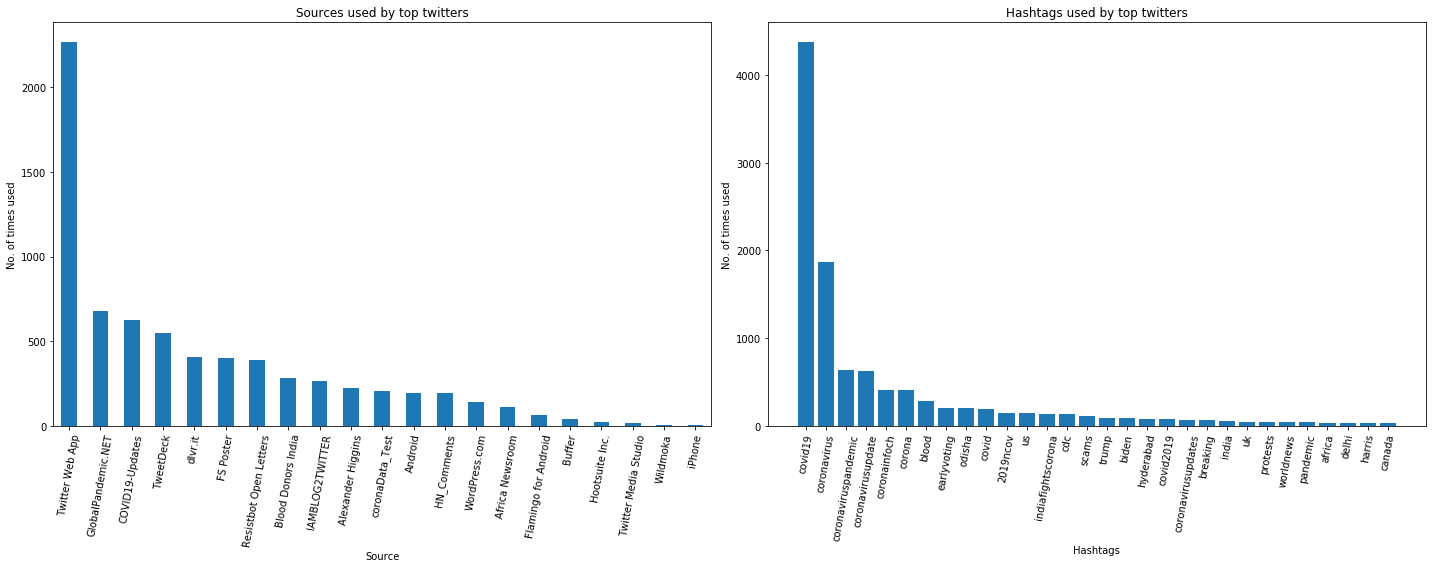

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
top_twitters_data['source'].value_counts().plot.bar();
plt.title("Sources used by top twitters"); plt.xlabel("Source"); plt.ylabel("No. of times used");
plt.xticks(rotation=80);

plt.subplot(1,2,2)
plt.bar(sorted_hashtags['Hashtag'][:top_n], sorted_hashtags['Count'][:top_n])
plt.title("Hashtags used by top twitters"); plt.xlabel("Hashtags"); plt.ylabel("No. of times used");
plt.xticks(rotation=80); plt.tight_layout()

- **Top Twitters do not use mobile phones like much of the overall population does, they use Webapp plus other sources**
- **Top tweeters are tending by using hashtags [covid19,coronavirus]**

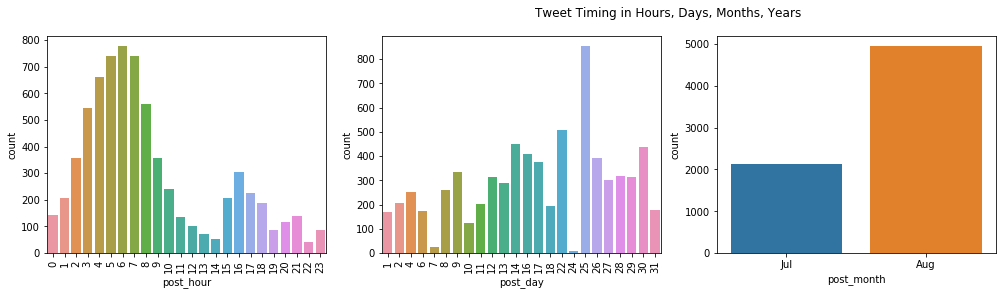

In [81]:
plt.figure(figsize=(23,4)); plt.suptitle('Tweet Timing in Hours, Days, Months, Years')
plt.tight_layout();
plt.subplot(1,4,1); sns.countplot(top_twitters_data['post_hour']); plt.xticks(rotation=90);
plt.subplot(1,4,2); sns.countplot(top_twitters_data['post_day']); plt.xticks(rotation=90);
plt.subplot(1,4,3); sns.countplot(top_twitters_data['post_month']); 

In [28]:
data.groupby('post_month').min()['post_day'], data.groupby('post_month').max()['post_day']

(post_month
 Aug     1
 Jul    24
 Name: post_day, dtype: int64,
 post_month
 Aug    30
 Jul    31
 Name: post_day, dtype: int64)

Considering that July data was from 24-31 only    
**Top twitters post most of their tweets at 6 am**,    
**There was a spike of tweets on 25th**, let's look why

In [29]:
Counter(flat_array(data[ data['post_day']==25 ]['hashtags'])).most_common()[:10]

[('COVID19', 7422),
 ('Covid19', 1127),
 ('covid19', 942),
 ('coronavirus', 663),
 ('Coronavirus', 298),
 ('COVID', 166),
 ('pandemic', 135),
 ('Covid', 134),
 ('India', 114),
 ('corona', 101)]

There's no seperate event on 25 

In [30]:
Counter(flat_array(data[ data['post_day']==25 ]['mentions'])).most_common()[0][0]

'realDonaldTrump'

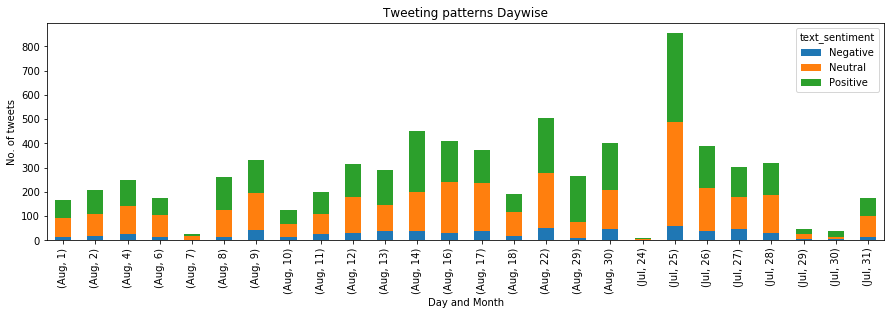

In [31]:
top_twitters_data.groupby(['post_month','post_day','text_sentiment']).count()['text'].unstack().plot.bar(stacked=True, figsize=(15,4));
plt.title("Tweeting patterns Daywise"); plt.ylabel("No. of tweets"); plt.xlabel("Day and Month");

There was no surge in any sentiment on 25th either

In [32]:
hashtags_at_25 = data[ data['post_day']==25 ]['hashtags']
hashtags_at_25 = flat_array(hashtags_at_25)
hashtags_at_25 = [hashtag.lower() for hashtag in hashtags_at_25 if ('corona' not in hashtag.lower() and 'covid' not in hashtag.lower())] 
hashtags_counter_25 = Counter(hashtags_at_25)
sorted_hashtags = sorted(hashtags_counter_25.items(), key=lambda x: x[1], reverse=True)
sorted_hashtags = pd.DataFrame(sorted_hashtags, columns=['Hashtag','Count'])

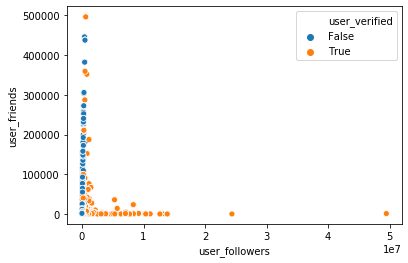

In [33]:
sns.scatterplot(data['user_followers'], data['user_friends'], hue='user_verified', data=data);

It seems that,    
**Verified accounts have high followings whereas,       
Unverified accounts have high number of friends *mostly*.**

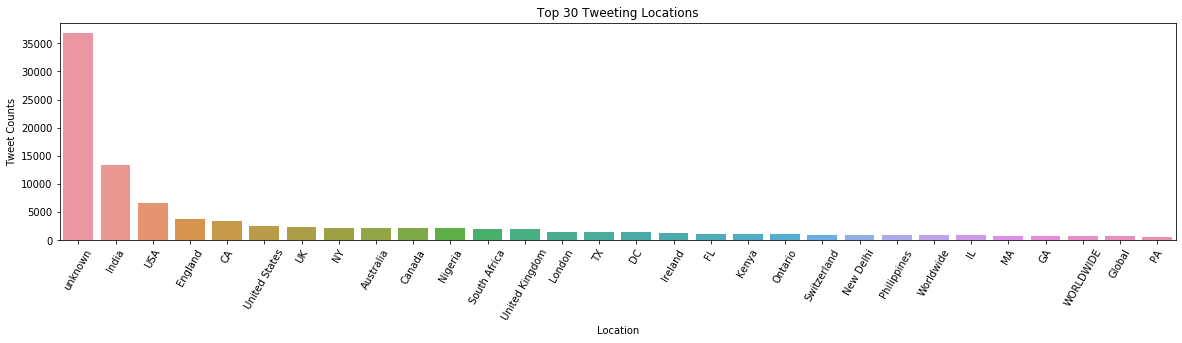

In [34]:
user_locations = data['user_location_end'].value_counts()
plt.figure(figsize=(20,4))
sns.barplot(x=user_locations.index.values[:top_n], y=user_locations[:top_n])
plt.xticks(rotation=60); 
plt.title(f"Top {top_n} Tweeting Locations"); plt.xlabel("Location"); plt.ylabel("Tweet Counts");

User Followers

In [35]:
from scipy.stats import mode

mode(['hi','there','hi']).mode[0]

'hi'

In [36]:
months_mapping = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [37]:
data[ data['user_name']=='Ministry of Health' ]['date'].max(), data[ data['user_name']=='Ministry of Health' ]['user_created'].max()

(Timestamp('2020-08-30 07:41:11'), Timestamp('2014-08-24 16:11:27'))

In [67]:
from scipy.stats import mode
user_growth = {}
number_of_posts = {}
mean_tweet_time = {}
overall_sentiment = {}
account_time = {}
user_total_likes = {}
mean_likes = {}
user_verified = {}
for username,group in data.groupby('user_name'):
    user_growth[username] = group['user_followers'].max() - group['user_followers'].min()
    number_of_posts[username] = group['text'].count()
    mean_tweet_time[username] = group['post_hour'].median()
    overall_sentiment[username] = mode(group['text_sentiment']).mode[0]
    account_time[username] = round((group['date'].max() - group['user_created'].min()).days/30)
    user_total_likes[username] = group['user_favourites'].sum()
    mean_likes[username] = group['user_favourites'].mean()
    user_verified[username] = mode(group['user_verified']).mode[0]

In [68]:
user_growth_data = pd.DataFrame([user_growth,number_of_posts,user_total_likes,mean_likes,mean_tweet_time,overall_sentiment, account_time, user_verified]).T.reset_index()
user_growth_data.columns = ['Username','Followers Increment','Number of Posts','Number of Likes','Mean Likes Per Post','Mean Tweet Time','Overall Sentiment', 'Account Time(months)','User Verified']

In [69]:
user_growth_data = user_growth_data.sort_values(by='Followers Increment', ascending=False)
user_growth_data.head()

,Username,Followers Increment,Number of Posts,Number of Likes,Mean Likes Per Post,Mean Tweet Time,Overall Sentiment,Account Time(months),User Verified
6738,Anonymous,7379653,8,68878,8609.75,8.5,Neutral,114,False
12642,CDC,3087024,11,25479,2316.27,15,Positive,125,True
50854,Ministry of Health,1968063,45,21568,479.289,7,Neutral,138,True
75199,The Star,1438356,8,1293,161.625,15,Neutral,139,True
83427,beIN SPORTS,1109525,5,11497,2299.4,7,Positive,137,True


In [70]:
for feature in ['Followers Increment','Number of Posts','Number of Likes','Mean Likes Per Post','Mean Tweet Time','Account Time(months)']:
    user_growth_data[feature] = user_growth_data[feature].astype(np.float64)

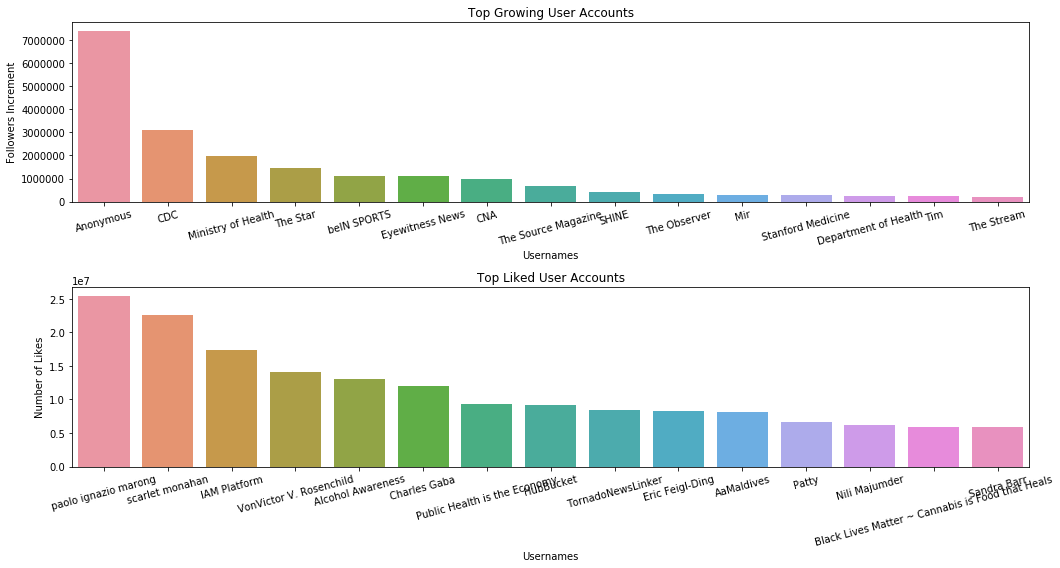

In [71]:
top_n = 15
plt.figure(figsize=(15,8))
sns.barplot(x=user_growth_data['Username'][:top_n], y=user_growth_data['Followers Increment'][:top_n], ax=plt.subplot(2,1,1));
plt.title("Top Growing User Accounts"); plt.xticks(rotation=15); plt.xlabel("Usernames");

liked_sorted = user_growth_data[['Username','Number of Likes']].sort_values(by='Number of Likes', ascending=False)
sns.barplot(x=liked_sorted['Username'][:top_n], y=liked_sorted['Number of Likes'][:top_n], ax=plt.subplot(2,1,2));
plt.title("Top Liked User Accounts"); plt.xticks(rotation=15); plt.xlabel("Usernames");

plt.tight_layout()

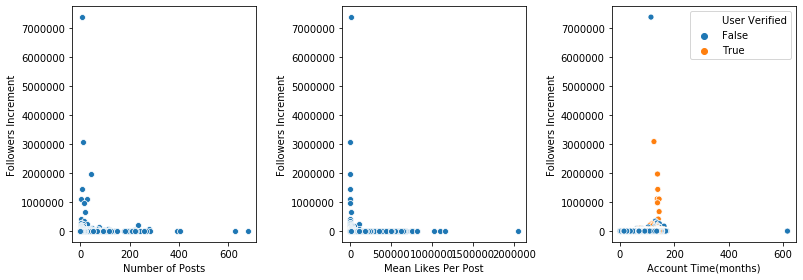

In [74]:
plt.figure(figsize=(15,4))
sns.scatterplot('Number of Posts', 'Followers Increment', data=user_growth_data, ax=plt.subplot(1,4,1))
sns.scatterplot('Mean Likes Per Post','Followers Increment', data=user_growth_data, ax=plt.subplot(1,4,2)); 
sns.scatterplot('Account Time(months)','Followers Increment', data=user_growth_data, hue='User Verified', ax=plt.subplot(1,4,3));
plt.tight_layout()

Number of Posts and Follower Increment are somewhat related *compared to* Number of Likes and Follower Increments.    
**Older accounts that are verified had verticle User growth**

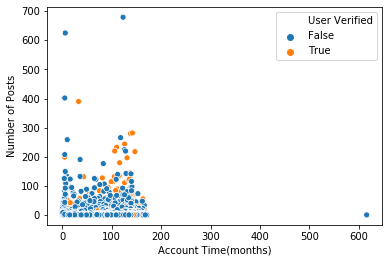

In [73]:
sns.scatterplot('Account Time(months)','Number of Posts', data=user_growth_data, hue='User Verified')

**Verified Users post more posts and are generally older.**

In [46]:
user_growth_data['Followers Increment'].dtype    #for some reason they are object

dtype('float64')

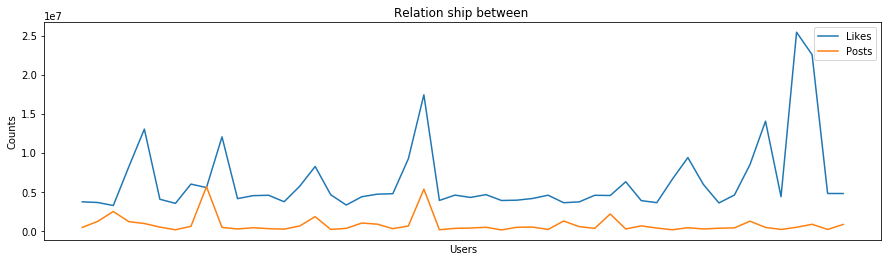

In [47]:
plt.figure(figsize=(15,4))
sorted_likes = user_growth_data.copy()
sorted_likes = user_growth_data.sort_values(by='Number of Likes', ascending=False)
sns.lineplot(sorted_likes['Username'][:50],sorted_likes['Number of Likes'][:50], label='Likes');
sns.lineplot(sorted_likes['Username'][:50],sorted_likes['Number of Posts'][:50]*20000, label='Posts');
plt.xticks([]); plt.xlabel("Users"); plt.ylabel("Counts"); plt.title("Relation ship between User likes and posts");

**There is some corelation beteween Total Number of likes and total number of posts**

## The END
### Thanks for giving me the opportunity to analysis